<a href="https://colab.research.google.com/github/swarnimam/ML_junk/blob/master/Level_Difficulty_in_CandyCrush_Saga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CandyCrush

In [0]:
import pandas as pd
import numpy as np
from matplotlib import *
import math

In [6]:
data=pd.read_csv("/content/candy_crush.csv")
data.head()

,player_id,dt,level,num_attempts,num_success
0,6dd5af4c7228fa353d505767143f5815,2014-01-04,4,3,1
1,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-01,8,4,1
2,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-05,12,6,0
3,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-03,11,1,1
4,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-07,15,6,0


In [7]:
data['dt']

0        2014-01-04
1        2014-01-01
2        2014-01-05
3        2014-01-03
4        2014-01-07
            ...    
16860    2014-01-07
16861    2014-01-01
16862    2014-01-01
16863    2014-01-06
16864    2014-01-01
Name: dt, Length: 16865, dtype: object

In [8]:
min(data['dt'])

'2014-01-01'

In [9]:
max(data['dt'])

'2014-01-07'

In [0]:
days=7

In [0]:
players=len(pd.unique(data['player_id']))

In [12]:
df=data.groupby('level').sum()
df

,num_attempts,num_success
level,,
1,1322,818
2,1285,666
3,1546,662
4,1893,705
5,6937,634
6,1591,668
7,4526,614
8,15816,641
9,8241,670


In [13]:
df['pro']=(df['num_success']/df['num_attempts'])*100
df

,num_attempts,num_success,pro
level,,,
1,1322,818,61.875946
2,1285,666,51.828794
3,1546,662,42.820181
4,1893,705,37.242472
5,6937,634,9.139397
6,1591,668,41.986172
7,4526,614,13.566063
8,15816,641,4.052858
9,8241,670,8.130081


In [14]:
df['level']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df

,num_attempts,num_success,pro,level
level,,,,
1,1322,818,61.875946,1
2,1285,666,51.828794,2
3,1546,662,42.820181,3
4,1893,705,37.242472,4
5,6937,634,9.139397,5
6,1591,668,41.986172,6
7,4526,614,13.566063,7
8,15816,641,4.052858,8
9,8241,670,8.130081,9


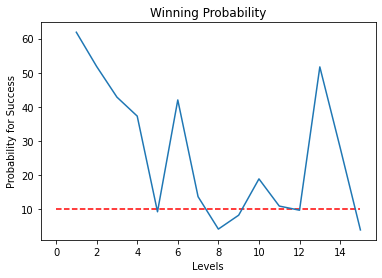

In [15]:
import matplotlib.pyplot as plt
plt.title('Winning Probability')
plt.xlabel('Levels')
plt.ylabel('Probability for Success')
plt.plot(df['level'],df['pro'])
plt.hlines(10,0,15,colors='red',linestyles='dashed')
plt.show()

In [16]:
df['error']=((df['pro']/100.0)*(1.0-(df['pro']/100.0)))/df['num_attempts']
for i in range(1,16):
  df['error'][i]=math.sqrt(df['error'][i])
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,num_attempts,num_success,pro,level,error
level,,,,,
1,1322,818,61.875946,1,0.013358
2,1285,666,51.828794,2,0.013939
3,1546,662,42.820181,3,0.012585
4,1893,705,37.242472,4,0.011112
5,6937,634,9.139397,5,0.003460
6,1591,668,41.986172,6,0.012373
7,4526,614,13.566063,7,0.005090
8,15816,641,4.052858,8,0.001568
9,8241,670,8.130081,9,0.003011


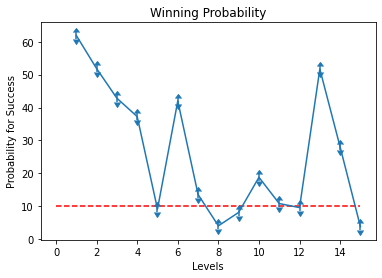

In [31]:
import matplotlib.pyplot as plt
plt.title('Winning Probability')
plt.xlabel('Levels')
plt.ylabel('Probability for Success')
plt.hlines(10,0,15,colors='red',linestyles='dashed')
plt.errorbar(df['level'],df['pro'],lolims=(df['pro']/100)-df['error'],yerr=True,uplims=(df['pro']/100)+df['error'])
plt.show()

In [33]:
p_win=(df['pro']/100).prod()
p_win

9.44714093448606e-12

**Should our level designer worry that a lot of players will complete the episode in one attempt?**

Seeing the p_win we can say that the level designers have been doing a great job.

In [35]:
if p_win>50:
  should_the_designer_worry=True
else:
  should_the_designer_worry=False
print (should_the_designer_worry)

False
